# Vizualiations and descriptive statistics

Overview:  
 - Plotting of area over time: Geomap with iterations over different year points
 - Timeseries of sector over time

In [46]:
import pandas as pd
import time, requests, re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {'axes.grid' : True})

%matplotlib inline

In [2]:
# Plotting timeseries of sector over year
data = 
data['country'] = data['station'].apply(extract_letters)

# This simply plots the same figure as above 
# but this time split by country. 
data.groupby(['country', 'datetime_dt'])\
    .agg('mean')\ 
    .reset_index()\
    .set_index('datetime_dt')\ #Set index to year
    .groupby('country')\ #Groupby: 
    .obs_value\
    .plot(figsize=[11,6])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

SyntaxError: invalid syntax (<ipython-input-2-e4e073b941ad>, line 2)

In [5]:
jobindex.area.unique()

array(['region hovedstaden', 'region syddanmark', 'region-midtjylland',
       'region-nordjylland', 'region-sjaelland'], dtype=object)

In [4]:
path = "/Github/Gruppe/EXAM/Dataset/Jobindex3_grafer.xlsx" #Insert absolute filepath

cols = list(range(1,9))
jobindex = pd.read_excel(path)
# df = data
jobindex

,year,area,sektor,jobtype,n_jobtype_area_,n_sektor_area,n_area,n_year,20-64years_area,20-64years_year,n_jobtype_area_pc,n_sektor_area_pc,n_area_pc,n_year_pc
0,2007,region hovedstaden,handel,boernepasning,234,29369,157867,380597,1021591,3278570,0.000229,0.028748,0.154531,0.116086
1,2007,region hovedstaden,handel,bud,1097,29369,157867,380597,1021591,3278570,0.001074,0.028748,0.154531,0.116086
2,2007,region hovedstaden,handel,detailhandel,15574,29369,157867,380597,1021591,3278570,0.015245,0.028748,0.154531,0.116086
3,2007,region hovedstaden,handel,frisoer,335,29369,157867,380597,1021591,3278570,0.000328,0.028748,0.154531,0.116086
4,2007,region hovedstaden,handel,hotel,6901,29369,157867,380597,1021591,3278570,0.006755,0.028748,0.154531,0.116086
5,2007,region hovedstaden,handel,rengoering,2985,29369,157867,380597,1021591,3278570,0.002922,0.028748,0.154531,0.116086
6,2007,region hovedstaden,handel,service,1790,29369,157867,380597,1021591,3278570,0.001752,0.028748,0.154531,0.116086
7,2007,region hovedstaden,handel,sikkerhed,580,29369,157867,380597,1021591,3278570,0.000568,0.028748,0.154531,0.116086
8,2007,region hovedstaden,industri,blik,867,16285,157867,380597,1021591,3278570,0.000849,0.015941,0.154531,0.116086
9,2007,region hovedstaden,industri,byggeri,1493,16285,157867,380597,1021591,3278570,0.001461,0.015941,0.154531,0.116086


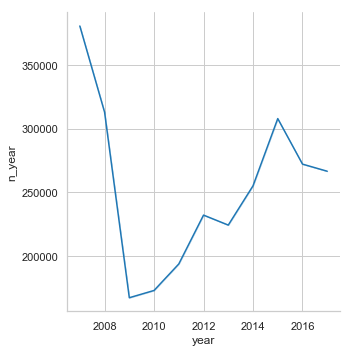

In [65]:
sns.relplot(x="year", y="n_year", kind="line", data=jobindex)
# All jobs over time 

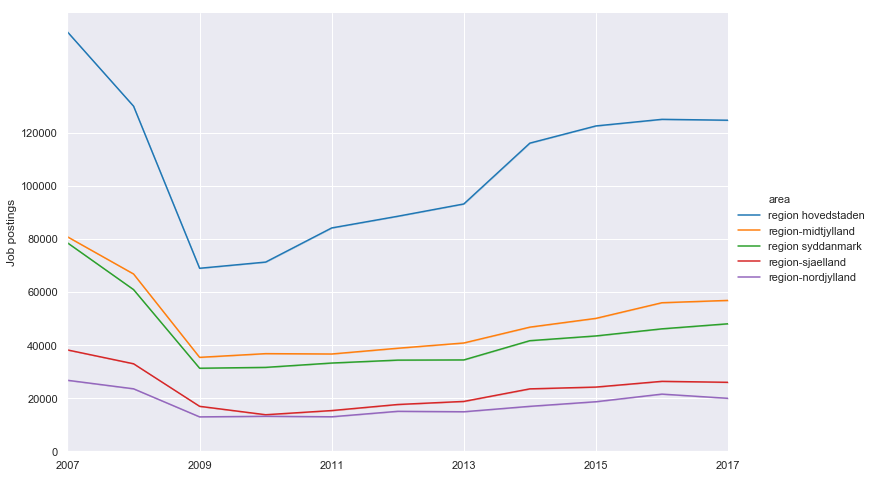

In [17]:
#Exclude "danmark" and sort by n_area and year (for nicer plot):
jobindex_area = jobindex.query(' area != "danmark"').sort_values(by=["n_area","year"], ascending=False)

sns.set_palette("tab10")
sns.relplot(x="year", y="n_area", 
            hue="area", 
            kind="line", 
            height=7, 
            aspect=1.5, 
            legend = "brief",
            data=jobindex_area)
plt.ylabel("Job postings")
plt.yticks(range(0,120001,20000))
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("")

# All jobs for each area over time - non pc

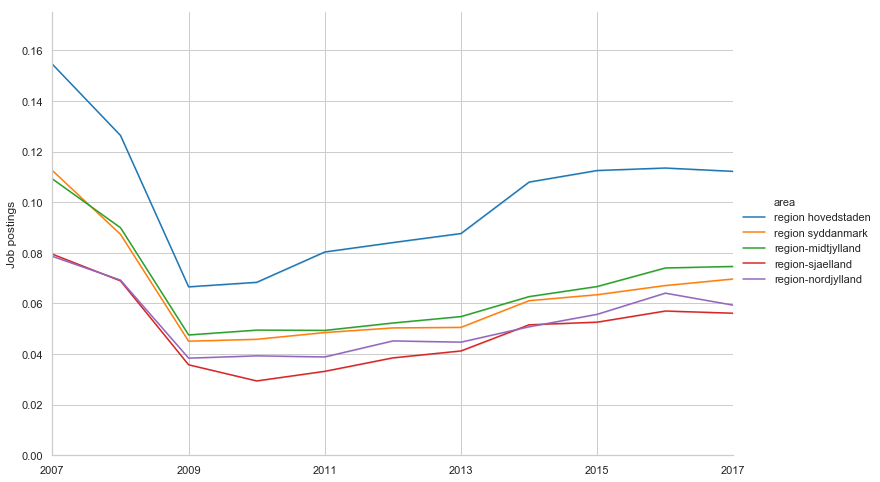

In [62]:
#Exclude "danmark" and sort by n_area and year (for nicer plot):
jobindex_area = jobindex.query(' area != "danmark"').sort_values(by=["n_area_pc","year"], ascending=False)

sns.set_palette("tab10")
sns.relplot(x="year", y="n_area_pc", 
            hue="area", 
            kind="line", 
            height=7, 
            aspect=1.5, 
            legend = "brief",
            data=jobindex_area)
plt.ylabel("Job postings")
plt.ylim(0,0.175)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("")

#All jobs for each area over time - per capita

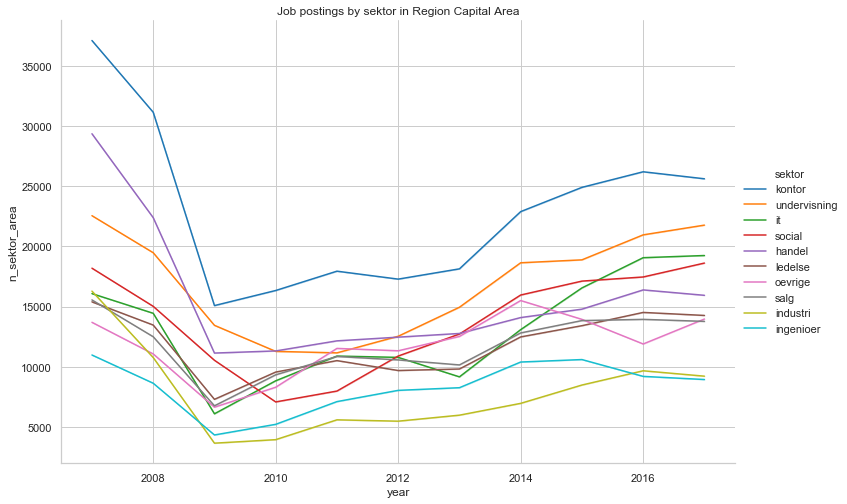

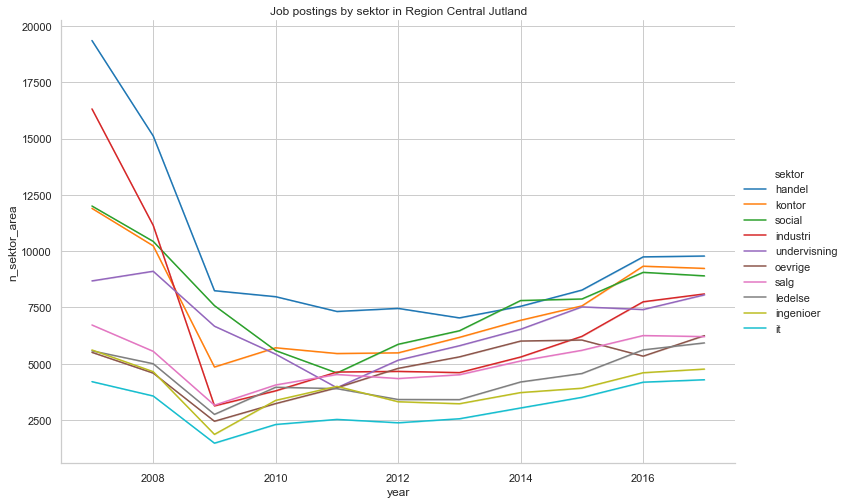

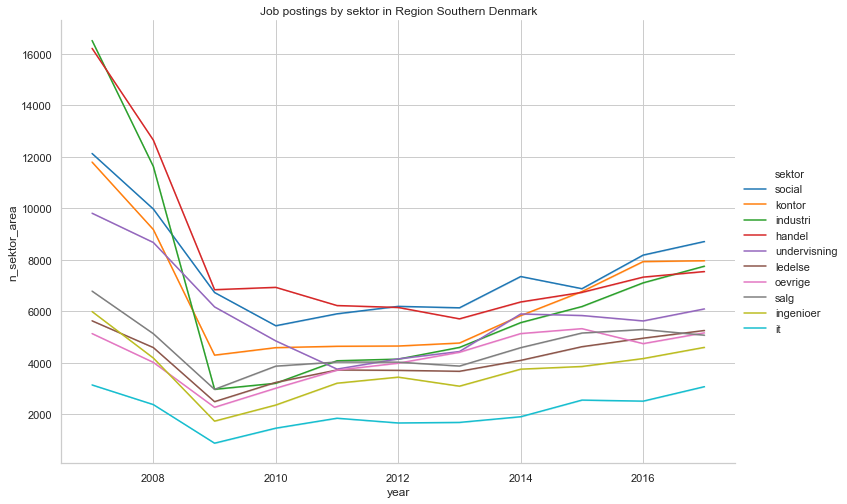

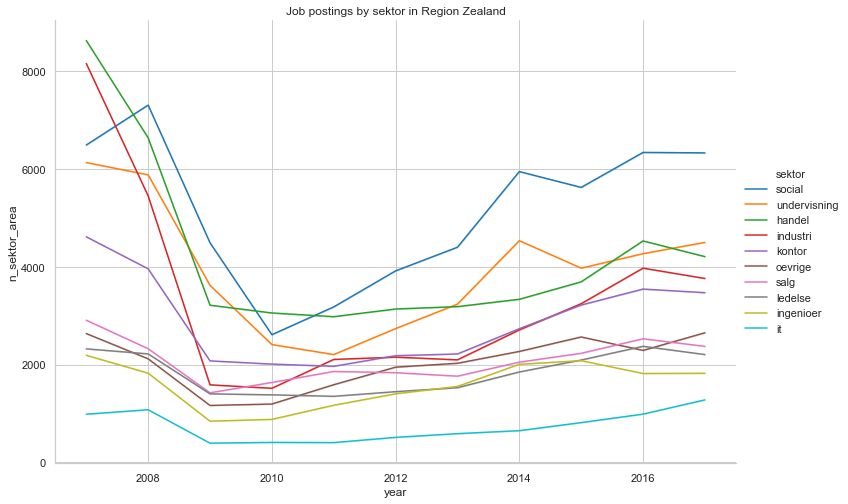

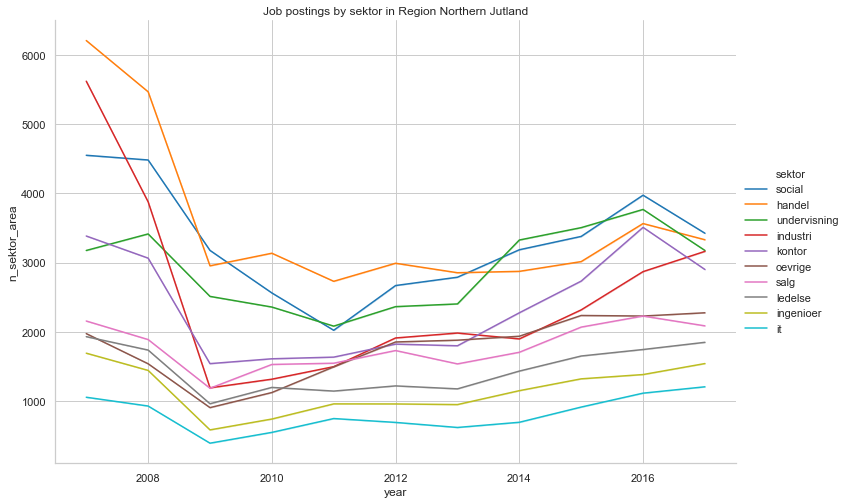

In [53]:
plt.close()

#All sectors for each area over time - absolute numbers

sns.set_palette("tab10")
#KØBENHAVN
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        legend = "brief",        
        height=7, 
        aspect=1.5, 
        data=jobindex.query('area == "region hovedstaden" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in Region Capital Area")

#MIDTJYLLAND
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region-midtjylland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in Region Central Jutland")

#SYDJYLLAND
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line",
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region syddanmark" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in Region Southern Denmark")

#REGION SJÆLLAND
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region-sjaelland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in Region Zealand")

#NORDJYLLAND
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region-nordjylland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in Region Northern Jutland")

plt.show()

Text(0.5,20.8,'Year')

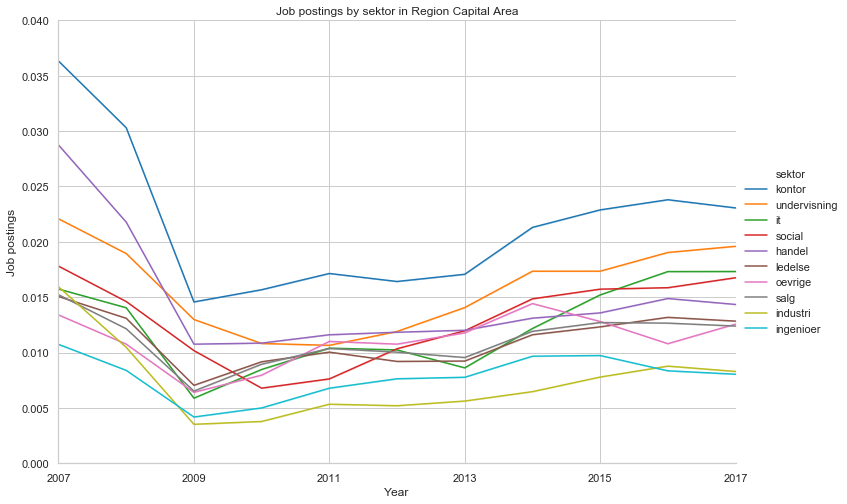

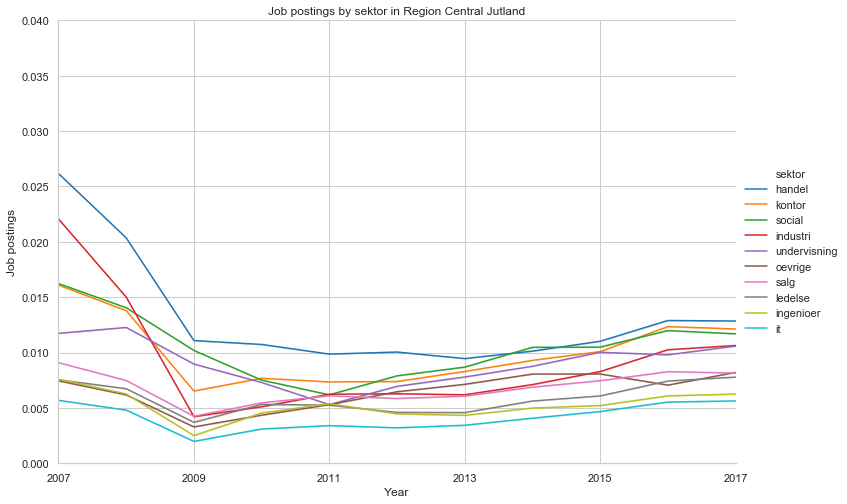

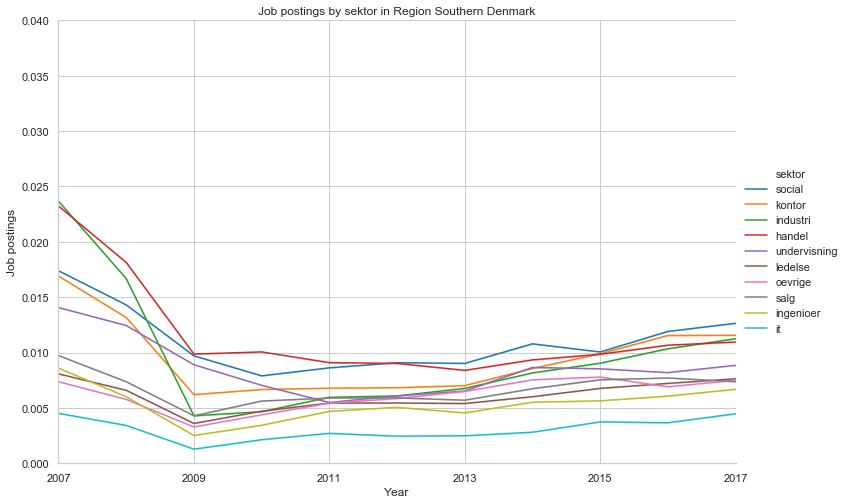

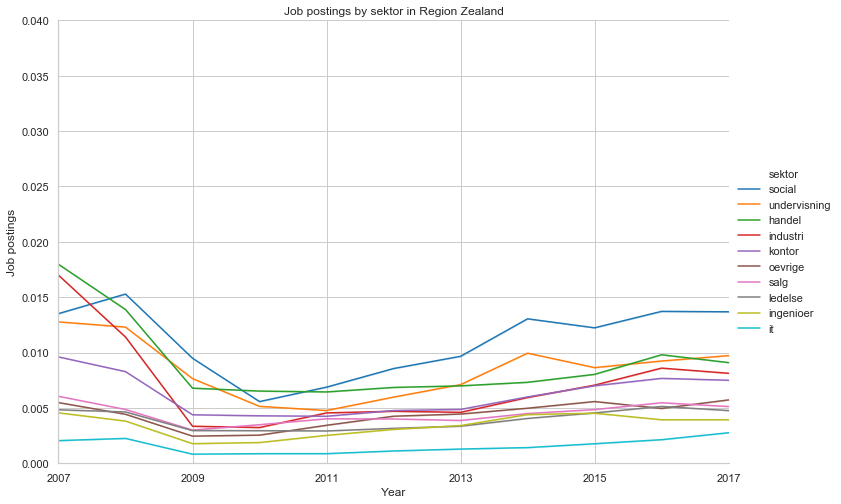

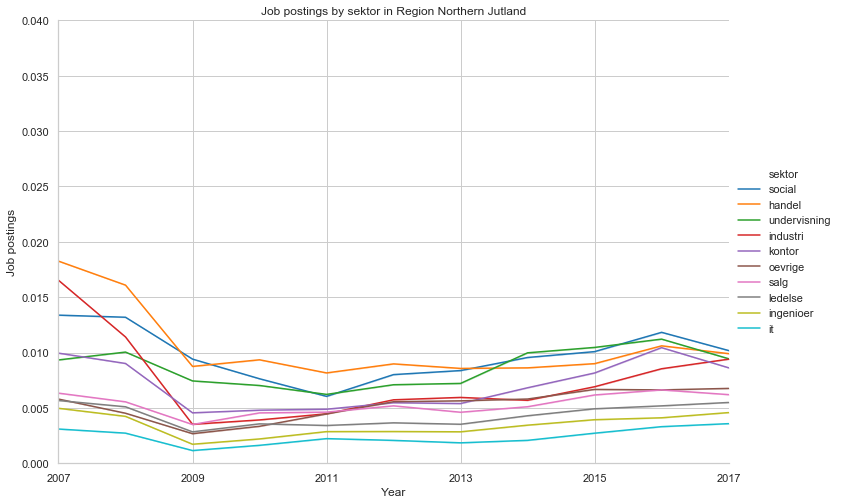

In [57]:
sns.set_palette("tab10")

#All sectors for each area over time - per capita

#KØBENHAVN
sns.relplot(x="year", y="n_sektor_area_pc", 
        hue="sektor", 
        kind="line", 
        legend = "brief",        
        height=7, 
        aspect=1.5, 
        data=jobindex.query('area == "region hovedstaden" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in Region Capital Area")
plt.ylabel("Job postings")
plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

#MIDTJYLLAND
sns.relplot(x="year", y="n_sektor_area_pc", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region-midtjylland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in Region Central Jutland")
plt.ylabel("Job postings")
plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

#SYDJYLLAND
sns.relplot(x="year", y="n_sektor_area_pc", 
        hue="sektor", 
        kind="line",
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region syddanmark" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in Region Southern Denmark")
plt.ylabel("Job postings")
plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

#REGION SJÆLLAND
sns.relplot(x="year", y="n_sektor_area_pc", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region-sjaelland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in Region Zealand")
plt.ylabel("Job postings")
plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")

#NORDJYLLAND
sns.relplot(x="year", y="n_sektor_area_pc", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region-nordjylland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in Region Northern Jutland")
plt.ylabel("Job postings")
plt.ylim(0,0.04)
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("Year")



In [ ]:
jobindex_topfem = jobindex.query(' area == "region hovedstaden" | area == "region-midtjylland" | area == "region syddanmark" | area == "region-sjaelland" | area == "region-nordjylland"' )

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

sns.barplot(x="area", y="n_jobtype_area_", 
            hue="sektor",
            ci=None,
            
            ax = ax1,
            data=jobindex_topfem.query('year == 2017'))
plt.title("Job Postings by area and sector in 2017")

sns.barplot(x="area", y="n_jobtype_area_", 
            hue="sektor",
            ci=None,
            ax = ax2,
            data=jobindex_topfem.query('year == 2007'))
plt.legend([])
plt.title("Job Postings by area and sector in 2007")

plt.show()

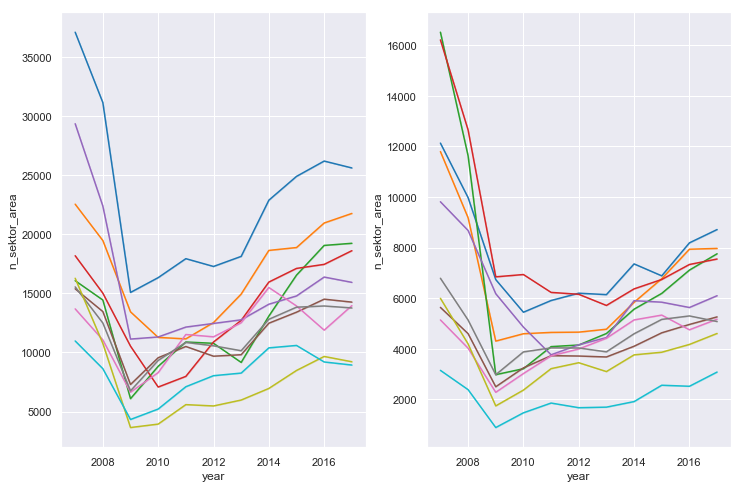

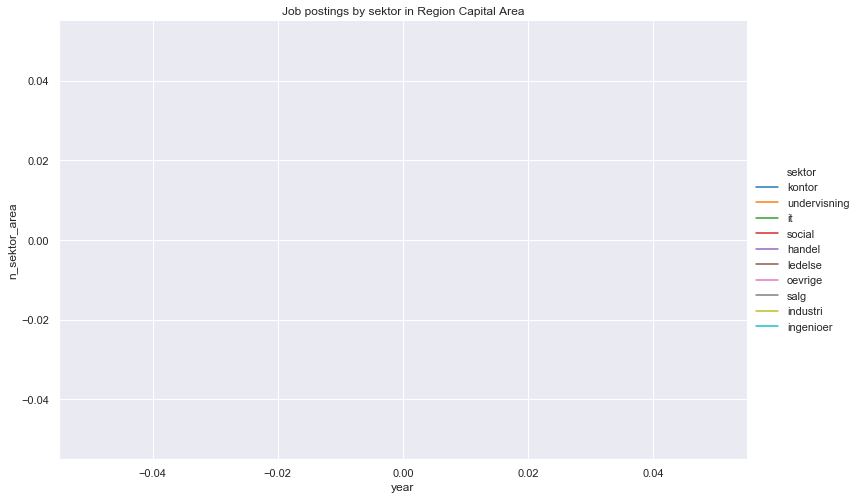

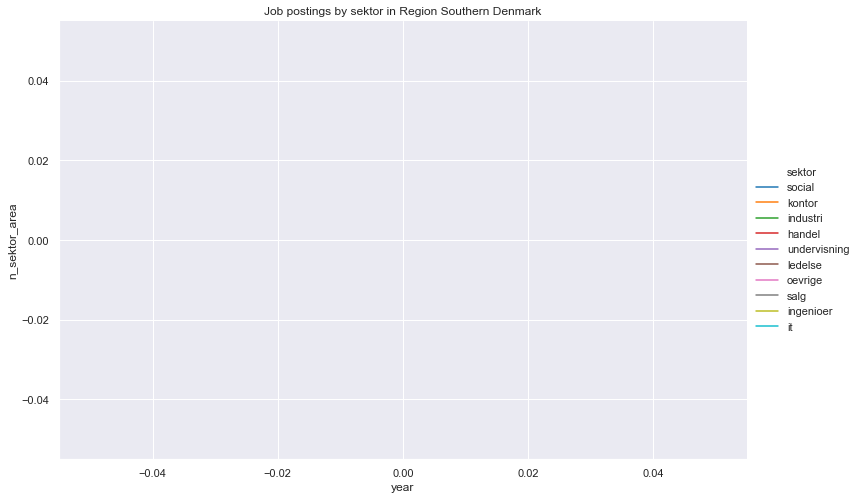

In [34]:
plt.close()

#Plots for comparison between regions - absolute numbers

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

#KØBENHAVN
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        legend = "brief",        
        height=7, 
        aspect=1.5, 
        ax=ax1,
        data=jobindex.query('area == "region hovedstaden" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in Region Capital Area")

#Syddanmark
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        legend = "brief",        
        height=7, 
        aspect=1.5, 
        ax=ax2,
        data=jobindex.query('area == "region syddanmark" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in Region Southern Denmark")

plt.show()

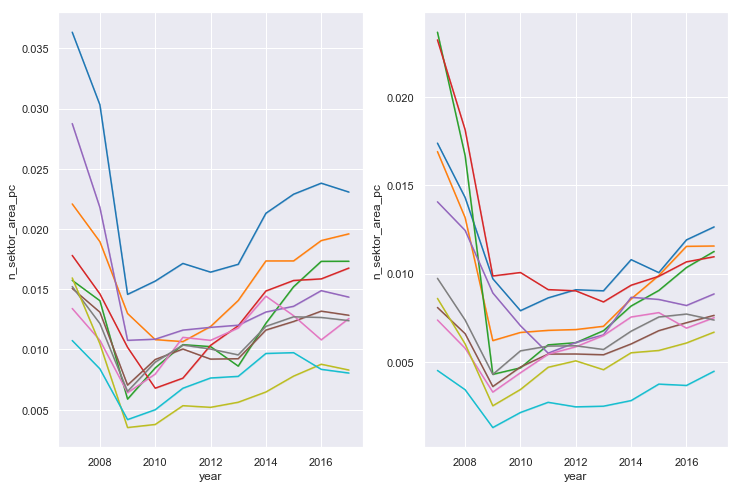

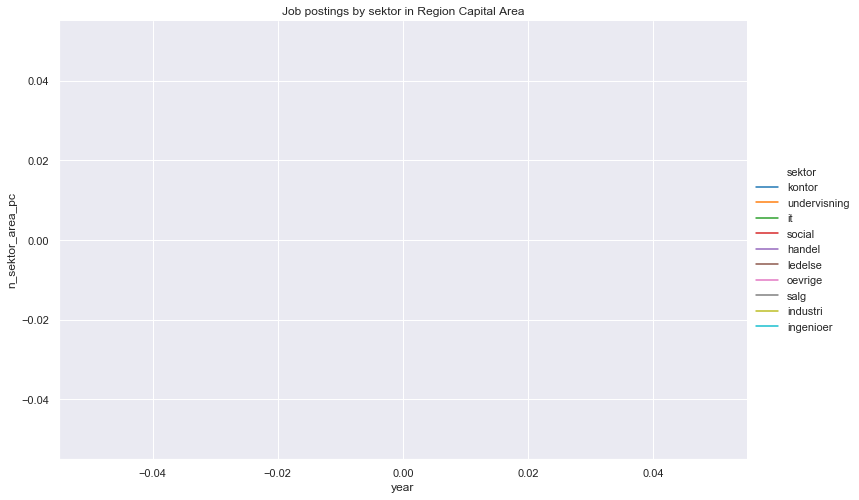

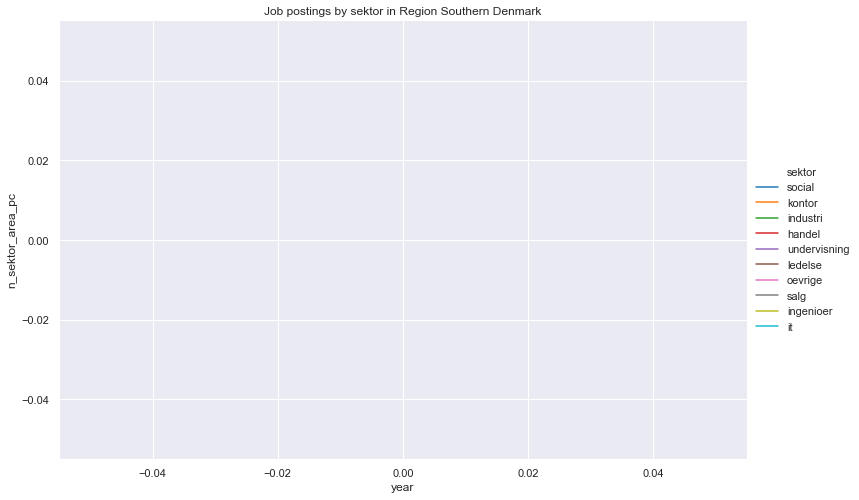

In [33]:
plt.close()

#Plots for comparison between areas - per capita

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

#KØBENHAVN
sns.relplot(x="year", y="n_sektor_area_pc", 
        hue="sektor", 
        kind="line", 
        legend = "brief",        
        height=7, 
        aspect=1.5, 
        ax=ax1,
        data=jobindex.query('area == "region hovedstaden" ').sort_values(by=["year", "n_sektor_area_pc"], ascending=False))
plt.title("Job postings by sektor in Region Capital Area")

#Syddanmark
sns.relplot(x="year", y="n_sektor_area_pc", 
        hue="sektor", 
        kind="line", 
        legend = "brief",        
        height=7, 
        aspect=1.5, 
        ax=ax2,
        data=jobindex.query('area == "region syddanmark" ').sort_values(by=["year", "n_sektor_area_pc"], ascending=False))
plt.title("Job postings by sektor in Region Southern Denmark")

plt.show()